# Análise Fatorial Exploratória no R

Atualmente, uma quantidade significativa de informações geradas não é mais descartada, mas sim armazenada em diversos bancos de dados. Embora algumas dessas informações possam ser analisadas com estatísticas simples,outras análises exigem técnicas que levam em conta as **interações das diferentes variáveis** que compõem nossas bases de dados. Neste contexto, a **Análise Multivariada** é uma alternativa poderosa para analisar **múltiplas variáveis** e **suas interações** em relação a indivíduos ou objetos de pesquisa. A partir de técnicas de análises **multivariadas** é possível: avaliar a existência de **associações** entre diferentes variáveis, criar indicadores a partir da **correlação** de variáveis ou identificar **padrões** formados a partir das variáveis que estão em nossos bancos de dados. Ou seja, com estas técnicas é possível entender melhor a **relação** entre as variáveis estudadas.

Uma das técnicas que está dentro do conjunto de Análise Multivariada é a **Análise Fatorial Exploratória** (AFE). A AFE é útil quando queremos identificar relações subjacentes (também chamado de fatores latentes) que representem nosso conjunto de dados. De forma mais simples, podemos dizer que a AFE nos ajuda a entender as "estruturas ocultas/relações não óbvias" de nossos dados. A Análise Fatorial exploratória é uma técnica de estatística muito utilizada em pesquisas científicas em diversas áreas do conhecimento. Para aprender um pouco mais sobre ela, você pode dar uma lida neste [artigo](https://periodicoscientificos.ufmt.br/ojs/index.php/eng/article/view/7599)!

##### Objetivo deste Projeto
É propor uma aplicação de Análise Fatorial Exploratória utilizando a Linguagem R.

### Humor Styles Questionnaire Responses 
*O Questionário de Estilos de Humor*

O Questionário de Estilos de Humor (HSQ) é um instrumento que permite que os próprios respondentes avaliem a qual estilo de humor individual pertencem. Existem quatro estilos de humor avaliados: humor afiliativo, otimista, agressivo e autodepreciativo. Essa estrutura de quatro estilos é baseada no trabalho de [Rod Martin](https://www.sciencedirect.com/science/article/abs/pii/S0092656602005342). Essa abordagem multidimensional do senso de humor foi traduzida para mais de 25 idiomas e possui um histórico psicométrico sólido, apresentando alta confiabilidade e validade em pesquisas realizadas em diferentes países e setores da sociedade.

Neste projeto, utilizaremos uma base de dados obtida no [Kaggle](https://www.kaggle.com/datasets/lucasgreenwell/humor-styles-questionnaire-responses), composta por respostas de participantes aos 32 itens do questionário. Nosso objetivo é identificar a estrutura esperada de quatro fatores, ou seja, os quatro estilos de humor mencionados no modelo utilizando a **Análise Fatorial Exploratória**.

http://rstudio-pubs-static.s3.amazonaws.com/497691_0f28e5764ad64b499bb68f8405446023.html#4_efa_with_minres_and_mle

http://rstudio-pubs-static.s3.amazonaws.com/331051_810df8c0346a429d8542ba42f48af63e.html


###### Dicionário dos 32 itens - Entendendo melhor cada um dos questionários.

Você encontra qual é o conteúdo dos 32 itens do modelo de Rod Martin, através deste [link](https://raw.githubusercontent.com/FerrazThales/AnaliseFatorialExploratoria/main/BaseDeDados/codebook.txt).

In [1]:
# bibliotecas que serão utilizadas no projeto
library(psych)
library(corrplot)

corrplot 0.92 loaded



In [2]:
# lendo a base de dados de um csv
path <- "BaseDeDados/data.csv"
# armazenando dentro de uma variável, a df
df <- read.csv(path)
# visualizando as 6 primeiras linhas do dataframe
head(df)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,⋯,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2,2,3,1,4,5,4,3,4,3,⋯,4,2,2,4.0,3.5,3.0,2.3,25,2,100
2,2,3,2,2,4,4,4,3,4,3,⋯,4,3,1,3.3,3.5,3.3,2.4,44,2,90
3,3,4,3,3,4,4,3,1,2,4,⋯,5,4,2,3.9,3.9,3.1,2.3,50,1,75
4,3,3,3,4,3,5,4,3,-1,4,⋯,5,3,3,3.6,4.0,2.9,3.3,30,2,85
5,1,4,2,2,3,5,4,1,4,4,⋯,5,4,2,4.1,4.1,2.9,2.0,52,1,80
6,3,3,3,2,3,3,4,2,2,1,⋯,4,3,3,3.6,2.9,3.4,2.6,30,2,60


Nosso dataframe trouxe cada um dos 32 itens (veja o conteúdo neste [link](https://raw.githubusercontent.com/FerrazThales/AnaliseFatorialExploratoria/main/BaseDeDados/codebook.txt)) a serem respondidos e algumas outras variáveis como gênero e idade que **não serão avaliadas** neste artigo. 

Repare que as respostas aos 32 itens vão de 1 a 5. Sendo:

* 1 = Nunca ou muito raramente verdadeiro
* 2 = Raramente verdadeiro
* 3 = Às vezes verdadeiro
* 4 = Frequentemente verdadeiro
* 5 = Muito frequentemente ou sempre verdadeiro
* -1 = Não selecionou uma resposta

Os dados também trazem as variáveis (colunas que estão no final do dataframe) que representam os estilos de humor de acordo com o estudo de [Rod Martin]((https://www.sciencedirect.com/science/article/abs/pii/S0092656602005342)):*affiliative, selfenhancing, agressive, selfdefeating*. Também vamos **desconsiderar** estas variáveis! Uma vez que nosso objetivo é encontrar estes 04 tipos de humor utilizando apenas as 32 questões.

In [3]:
# utilizando os valores apenas das questões (1~32)
df <- df[,c(1:32)]
# calculando o número de linhas do dataframe
num_participantes <- nrow(df)
# calculando o número de colunas do dataframe
num_var <- ncol(df)
cat('Número de Participantes:',num_participantes,'\n')
cat('Número de Variáveis:',num_var)

Número de Participantes: 1071 
Número de Variáveis: 32

# Análise Exploratória de Dados

Agora é a hora de dar uma olhada inicial nos dados. Entender como está a distribuição de cada variável, se existem valores nulos ou outliers.

Primeiro vamos usar o método [describe](https://www.rdocumentation.org/packages/psych/versions/1.7.8/topics/describe). Ele fornece algumas estatísticas descritivas para cada variável do dataframe: 
* **vars**: o número de variáveis analisadas.
* **n**: o número de observações válidas para cada variável.
* **mean**: a média das observações.
* **sd**: o desvio padrão das observações.
* **median**: a mediana das observações.
* **trimmed**: a média truncada das observações, que exclui uma proporção igual de valores extremos em cada extremidade da distribuição.
* **mad**: o desvio absoluto da mediana, uma medida robusta de dispersão.
* **min**: o valor mínimo das observações.
* **max**: o valor máximo das observações.
* **range**: a amplitude, ou seja, a diferença entre o valor máximo e o valor mínimo.
* **skew**: a assimetria da distribuição, indicando se ela é deslocada para a esquerda ou para a direita.**Faz mais sentido aplicar em variáveis contínuas!**
* **kurtosis**: a curtose da distribuição, que mede o grau de achatamento em relação à distribuição normal.**Faz mais sentido aplicar em variáveis contínuas!**
* **se**: o erro padrão da média, uma estimativa da variabilidade da média.

In [4]:
# calculando as estatísticas descritivas do dataframe
desc <- describe(df)
# arrendondando para duas casas decimais
round(desc,2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Q1,1,1071,2.03,1.08,2,1.88,1.48,-1,5,6,0.86,0.26,0.03
Q2,2,1071,3.34,1.11,3,3.39,1.48,-1,5,6,-0.43,-0.13,0.03
Q3,3,1071,3.08,1.17,3,3.10,1.48,-1,5,6,-0.17,-0.62,0.04
Q4,4,1071,2.83,1.16,3,2.81,1.48,-1,5,6,0.11,-0.74,0.04
Q5,5,1071,3.60,1.06,4,3.68,1.48,-1,5,6,-0.63,0.23,0.03
Q6,6,1071,4.15,0.98,4,4.30,1.48,-1,5,6,-1.26,1.75,0.03
Q7,7,1071,3.28,1.10,3,3.31,1.48,-1,5,6,-0.40,-0.23,0.03
Q8,8,1071,2.54,1.23,2,2.48,1.48,-1,5,6,0.22,-0.62,0.04
Q9,9,1071,2.58,1.22,2,2.50,1.48,-1,5,6,0.40,-0.56,0.04


Conforme esperado, os valores vão de -1 (não respondeu a questão) até 5 (considerou que o item é muito frequente ou verdadeiro). 

Agora vamos analisar a média das respostas e seus padrões. O gráfico abaixo é do método [error.dots](https://www.rdocumentation.org/packages/psych/versions/1.7.8/topics/error.dots), e nos ajuda a entender um pouco melhor sobre quais foram as médias de cada item e seus respectivos intervalos de confiança.

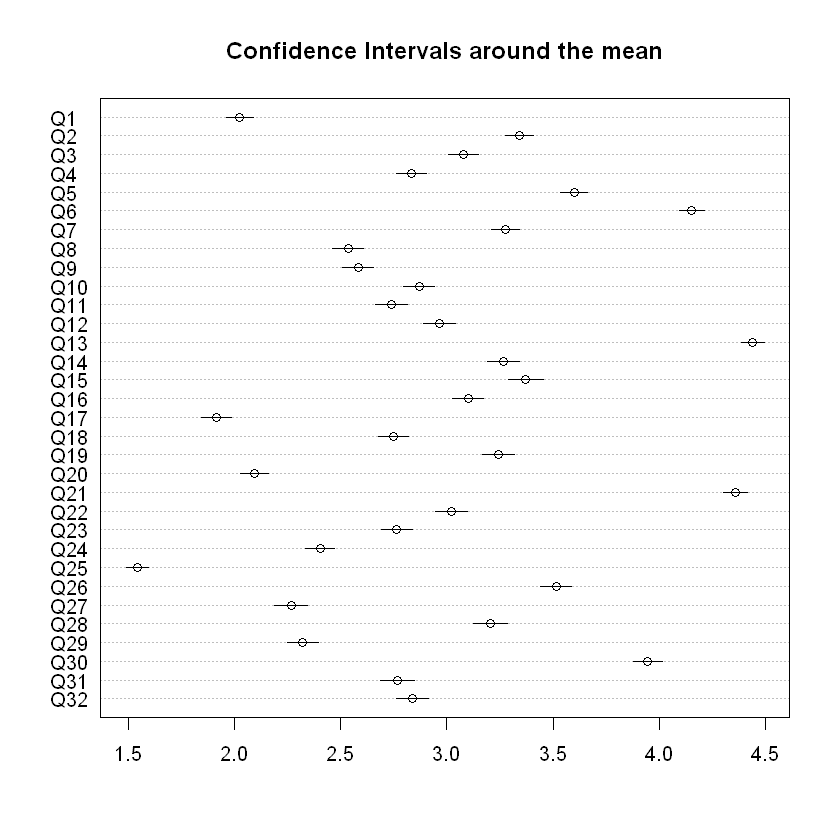

In [5]:
error.dots(df, sort = FALSE, alpha = 0.05,head=32) # intervalo de confiança a 95%

As questões que tiveram as médias das notas mais próximas a 1 ou a 5 foram:

* Próximas a 1 (*Nunca ou muito raramente verdadeiro*):
    * **Q25**: *I don't often joke around with my friends*.
* Próximas a 5 (*Muito frequentemente ou sempre verdadeiro*):
    * **Q13**:  *I laugh and joke a lot with my closest friends*.
    * **Q21**: *I enjoy making people laugh*.
### Verificando a correlação das variáveis
Como queremos encontrar as **estruturas subjacentes** de nossos dados, obviamente muitas variáveis devem ser correlacionadas. Não faz muito sentido a variável Q1 e Q2, por exemplo, pertencerem ao mesmo fator¹ (mesma dimensão) e não terem correlação nenhuma ou serem negativamente correlacionadas. Por conta disso, é preciso avaliar a correlação de nossos dados!

*¹ Fator se refere a um conjunto de variáveis fortemente correlacionadas, ele representa uma dimensão em nossos dados. Mais pra frente esta definição ficará mais clara!*

Mas qual correlação que devemos adotar? Existe a de Pearson, Kimball, etc. Cada uma delas tem uma situação de uso. No nosso caso, como as respostas do questionário são variáveis **categóricas ordinais** (escala de 1 a 5 - de *raramente a sempre verdadeiro*) é necessário aplicar a [correlação policórica](https://psicometriaonline.com.br/o-que-e-correlacao-policorica/). Para isso, vamos utilizar o método [mixedCor](https://www.rdocumentation.org/packages/psych/versions/2.3.6/topics/mixedCor).

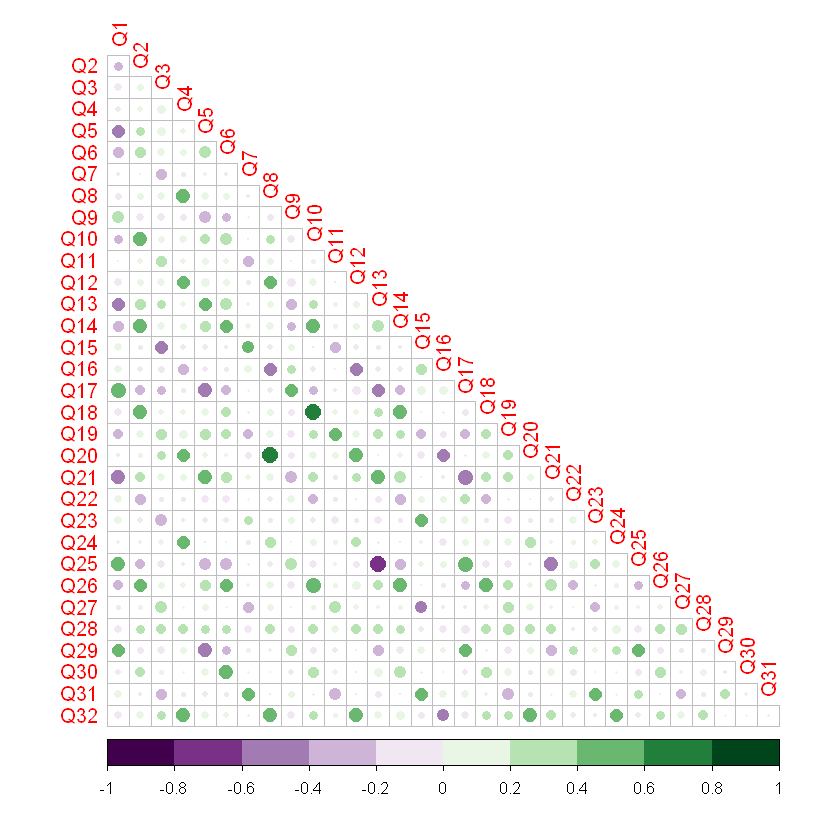

In [6]:
# aplicando a correlação policórica
df_cor <- mixedCor(df,p=1:32)
# obtendo um dataframe com os valores da correlação
matriz_de_correlacao = df_cor$rho
# plotando um visual da matriz de correlação
corrplot(matriz_de_correlacao, diag=FALSE, method='circle', type='lower',  col = COL2('PRGn', 10))

Pelo gráfico de correlação acima, podemos observar que:

* As questões **Q20** (*I often go overboard in putting myself down when I am making jokes or trying to be funny*) e **Q08** (*I will often get carried away in putting myself down if it makes my family or friends laugh*) tem **alta correlação positiva**.
* As questões **Q18** (*If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up*) e **Q10** (*If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better*) tem **alta correlação positiva**.
* As questões **Q25** (*I don't often joke around with my friends*) e **Q13** (*I laugh and joke a lot with my closest friends*) tem **alta correlação negativa**.

No entanto, apenas a partir deste gráfico não é possível verificar a estrutura subjacente (padrão oculto) do questionário. Ou seja, só com este gráfico não conseguimos encontrar os 04 estilos de humor propostos por [Rod Martin](https://www.sciencedirect.com/science/article/abs/pii/S0092656602005342)!

Portanto, é preciso utilizar outra técnica estatística que nos ajude a encontrar a estrutura subjacente de nosso dados. Por conta disso, vamos usar a **Análise Fatorial Exploratória**.

# Verificando se é viável a aplicação da Análise Fatorial

O primeiro passo para aplicar a **Análise Fatorial Exploratória** é verificar se a utilização da análise fatorial tem validade para os nossos dados. Para isso, podemos utilizar dois métodos: o critério de Kaiser-Meyer-Olkin (KMO) e o Teste de Esfericidade de Bartlett.

* O [critério KMO](https://www.ibm.com/docs/pt-br/spss-statistics/29.0.0?topic=detection-kmo-bartletts-test) indica a proporção de variância em suas variáveis que pode ser causada por fatores subjacentes. De forma geral, ele avalia a adequaçãos dos dados para a análise fatorial considerando a correlação entre as variáveis. Para [Hair](https://www.amazon.com.br/An%C3%A1lise-Multivariada-Dados-Joseph-Hair/dp/857780402X) valores maiores que 0,5 são considerados aceitáveis.
* O [Teste de Esfericidade de Bartlett](https://www.ibm.com/docs/pt-br/spss-statistics/29.0.0?topic=detection-kmo-bartletts-test) avalia se a matriz de correlação entre as variáveis é significativamente diferente da matriz identidade. Fazemos isso, porque as matrizes identidade tem as variáveis não correlacionadas. Assim, se o teste der que a matriz é diferente da identidade é possível aplicar a análise fatorial.


Para calcular o índice **KMO** utilizaremos o método [KMO](https://search.r-project.org/CRAN/refmans/psych/html/KMO.html) e para calcular o Teste de **Bartlett** utilizaremos o método [cortest.bartlett ](https://search.r-project.org/CRAN/refmans/psych/html/cortest.bartlett.html).

In [7]:
# calculando o índice KMO do pacote psych
KMO(matriz_de_correlacao)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = matriz_de_correlacao)
Overall MSA =  0.87
MSA for each item = 
  Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16 
0.94 0.93 0.91 0.89 0.90 0.87 0.82 0.86 0.96 0.84 0.77 0.90 0.84 0.93 0.82 0.84 
 Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  Q29  Q30  Q31  Q32 
0.87 0.81 0.89 0.82 0.86 0.85 0.81 0.85 0.81 0.88 0.83 0.93 0.87 0.81 0.80 0.91 

O resultado geral do teste deu 0.87, isso indica que uma análise fatorial pode ser útil. Além disso, a maioria dos itens individuais (Q1 a Q32) também apresenta valores de MSA acima de 0.7, o que sugere que esses itens são adequados para análise fatorial.

Agora vamos verificar a **viabilidade da análise fatorial**, utilizando o teste de bartlett.

In [10]:
# fazendo o teste de bartlett com o pacote psych
cortest.bartlett(matriz_de_correlacao, n = num_participantes)

$chisq
[1] 14320.89

$p.value
[1] 0

$df
[1] 496

A hipótese nula do **teste de bartlett** diz que a matriz de correlação é uma matriz identidade, o que significa que não há uma correlação significativa entre as variáveis. Como nosso p-valor deu próximo de zero, podemos afirmar que o teste estatístico nos aponta que esta hipótese nula pode ser rejeitada. Então, podemos assumir que nossa matriz de correlação não é a identidade e seguir com nossa análise fatorial.

# Decisão de Quantos Fatores serão extraídos

descobrir quais os testes que você tem que aplicar e escrever umt exto

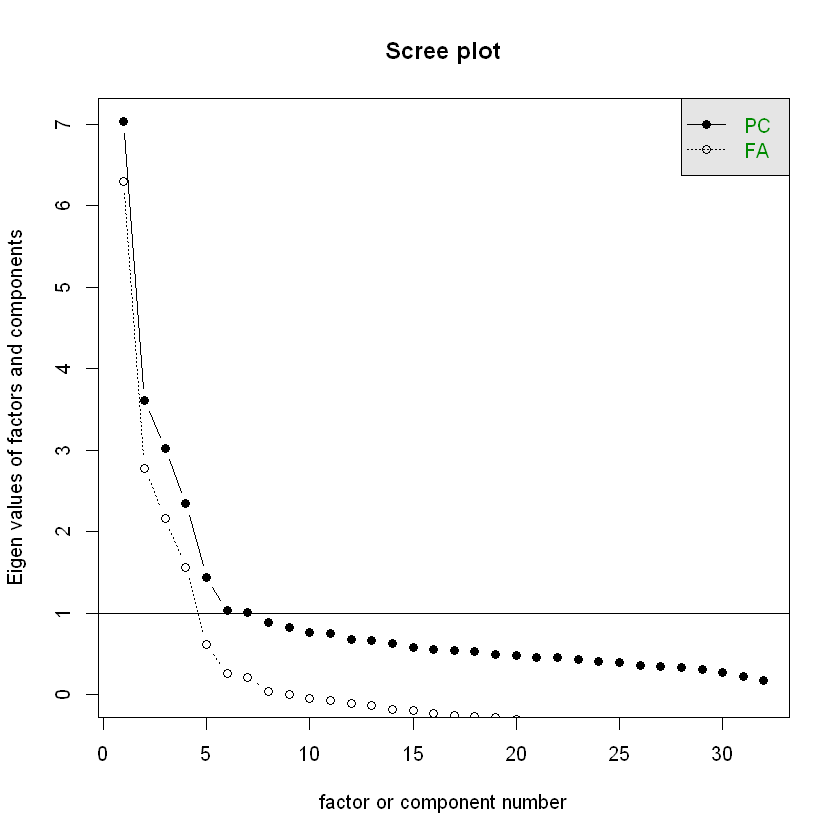

In [11]:
scree(matriz_de_correlacao)